In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore')

plt.rcParams['font.family'] = 'NanumGothic'

#시각화 색상 통일

col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

df = pd.read_csv('mapo_2019.csv')

# 시간데이터 datetime으로 변환
df['측정일시'] = df.apply(lambda row: datetime.strptime(str(row['측정일시']), '%Y-%m-%d %H:%M:%S'), axis = 1)

> 미세먼지 농도가 **0 ~ 30은 좋음**, **31 ~ 80은 보통**, **81 ~ 150은 나쁨**, **151 이상은 매우 나쁨**으로 등급을 나눕니다. <br>
> 초미세먼지 농도는 **0 ~ 15은 좋음**, **16 ~ 35은 보통**, **36 ~ 75은 나쁨**, **76 이상은 매우 나쁨**으로 등급을 나눕니다. <br>
> **좋음, 보통, 나쁨, 매우 나쁨**일때 기준으로 구분해 등급을 나누겠습니다.

In [2]:
# 미세먼지 농도가  0 ~ 30은 0, 31 ~ 80은 1, 81 ~ 150은 2, 151 이상은 3으로 등급을 나눈다

for (i, row) in df.iterrows():
    dust = row[2]
    k = '오류'
    
    if dust < 31:
        k = '좋음'
    elif dust < 81:
        k = '보통'
    elif dust < 151:
        k = '나쁨'
    else:
        k = '매우 나쁨'
    df.loc[i, 'dust_alarm'] = k

In [3]:
# 초미세먼지 농도가  0 ~ 15은 0, 16 ~ 35은 1, 36 ~ 75은 2, 76 이상은 3으로 등급을 나눈다

for (i, row) in df.iterrows():
    f_dust = row[3]
    k = '오류'
    
    if f_dust < 16:
        k = '좋음'
    elif f_dust < 36:
        k = '보통'
    elif f_dust < 76:
        k = '나쁨'
    else:
        k = '매우 나쁨'
    df.loc[i, 'f_dust_alarm'] = k

In [4]:
df.head()

,측정소명,측정일시,dust,f_dust,oz,no2,dust_alarm,f_dust_alarm
0,마포구,2019-01-31 23:00:00,52,12,0.018,0.015,보통,좋음
1,마포구,2019-01-31 22:00:00,70,13,0.019,0.014,보통,좋음
2,마포구,2019-01-31 21:00:00,69,13,0.017,0.016,보통,좋음
3,마포구,2019-01-31 20:00:00,88,14,0.016,0.017,나쁨,좋음
4,마포구,2019-01-31 19:00:00,101,18,0.012,0.020,나쁨,보통


# 1. 2019 한 해동안 마포구 미세먼지 등급 발령 barplot, piechart

보통       3974
좋음       3786
나쁨        845
매우 나쁨     155
Name: dust_alarm, dtype: int64


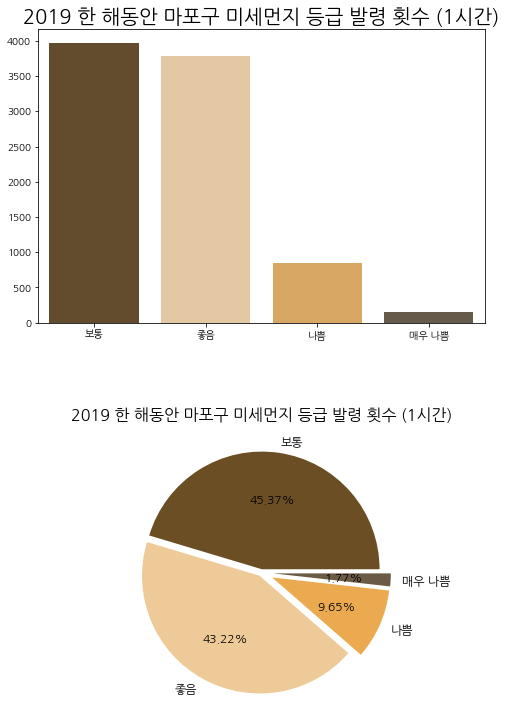

In [5]:
dc = df['dust_alarm'].value_counts()
print(dc)

fig, axes = plt.subplots(2, 1, figsize=(8,12))

sns.barplot(ax = axes[0], x = dc.index,
            y = dc.values, palette = col).set_title('2019 한 해동안 마포구 미세먼지 등급 발령 횟수 (1시간)', size = 20)
axes[1].pie(labels = dc.index, x = dc.values,
            explode = [0.03, 0.03, 0.1, 0.1], colors = col,
            textprops = {'fontsize' : 12}, autopct = "%.2f%%")
plt.title('2019 한 해동안 마포구 미세먼지 등급 발령 횟수 (1시간)', size = 16)
plt.subplots_adjust(left = 0.125, bottom = 0.1,  right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.35)
plt.show()

# 2. 요일별 마포구 미세먼지 등급 발령 barplot, piechart

In [6]:
# datetime 변수를 요일변수로 할당

week = ['월', '화', '수', '목', '금', '토', '일']

df['요일'] = df.apply(lambda row: week[datetime.date(row['측정일시']).weekday()], axis = 1)

In [7]:
df.head()

,측정소명,측정일시,dust,f_dust,oz,no2,dust_alarm,f_dust_alarm,요일
0,마포구,2019-01-31 23:00:00,52,12,0.018,0.015,보통,좋음,목
1,마포구,2019-01-31 22:00:00,70,13,0.019,0.014,보통,좋음,목
2,마포구,2019-01-31 21:00:00,69,13,0.017,0.016,보통,좋음,목
3,마포구,2019-01-31 20:00:00,88,14,0.016,0.017,나쁨,좋음,목
4,마포구,2019-01-31 19:00:00,101,18,0.012,0.020,나쁨,보통,목


In [8]:
df_al = df[df['dust'] >= 81]
days = df_al.groupby(['요일']).agg({'dust_alarm' : 'count'}).reset_index()
days 

,요일,dust_alarm
0,금,138
1,목,121
2,수,183
3,월,136
4,일,90
5,토,158
6,화,174


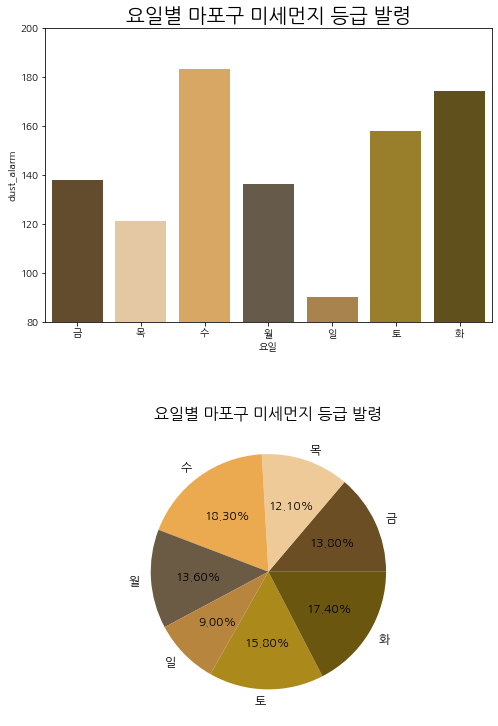

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(8,12))

sns.barplot(ax = axes[0], x = days['요일'],
            y = days['dust_alarm'], palette = col).set_title('요일별 마포구 미세먼지 등급 발령', size = 20)
axes[0].axis([-0.5, 6.5, 80, 200])
axes[1].pie(labels = days['요일'], x = days['dust_alarm'],
            colors = col, textprops = {'fontsize' : 12}, autopct = "%.2f%%")
plt.title('요일별 마포구 미세먼지 등급 발령', size = 16)
plt.subplots_adjust(left = 0.125, bottom = 0.1,  right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.35)
plt.show()

# 3. 미세먼지가 가장 심한 날짜시간 Top 10

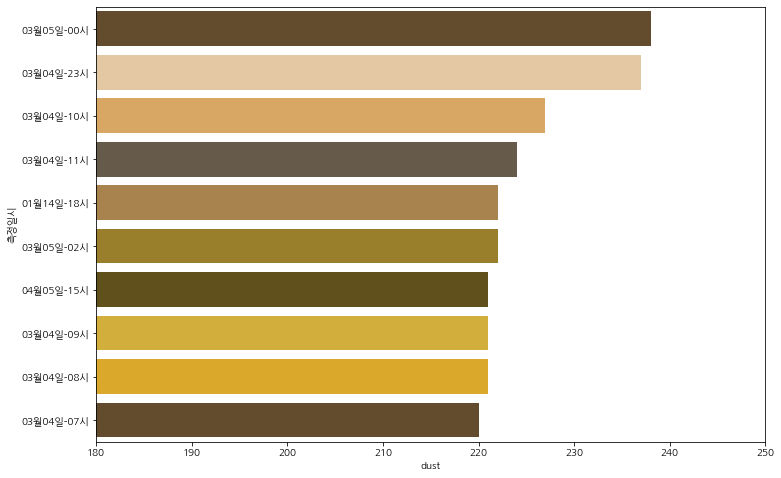

In [2]:
# 미세먼지가 가장 심한 날 Top 10

plt.figure(figsize = (12, 8))

dust_srt = df.sort_values('dust', ascending = False)
sns.barplot(x = dust_srt['dust'][:10], y = dust_srt['측정일시'][:10].apply(lambda x : x.strftime('%m월%d일-%H시')), palette = col)
plt.axis([180, 250, 9.5, - 0.5])
plt.show()

## 미세먼지가 심한 날 Top 10 중 3월 5일이 2번, 3월 4일이 6번 있는 등 미세먼지가 심한 시간이 몰려서 있는 밀집현상을 보이고 있음.

In [4]:
# 미세먼지 심한 날이 얼마나 뭉쳐있는지 확인

top_100 = dust_srt.iloc[:100, :]

In [6]:
top_100['day'] = top_100.apply(lambda row: row['측정일시'].strftime('%m%d'), axis = 1)

# of days in top-100:  13 일
----------


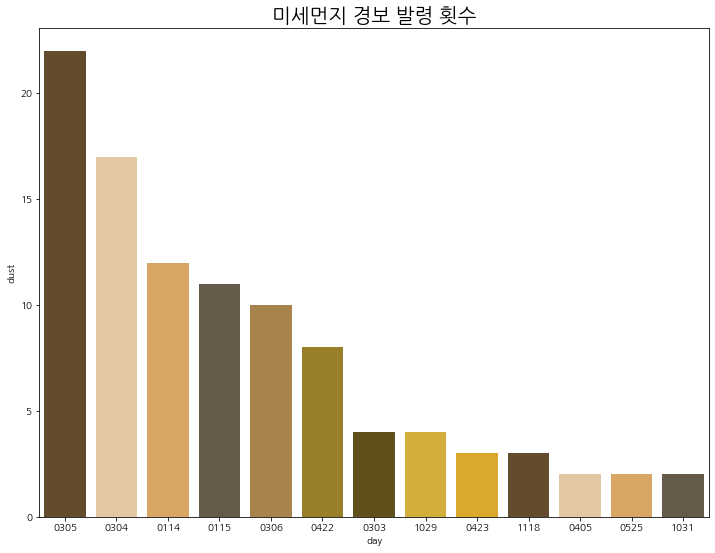

In [13]:
tp = top_100.groupby(['day']).agg({'dust' : 'count'}).reset_index()
tp = tp.sort_values('dust', ascending = False)

print('# of days in top-100: ', len(tp['day']), '일')
print('-' * 10)

plt.figure(figsize = (12, 9))

sns.barplot(x = tp['day'], y = tp['dust'],
            palette = col)
plt.title('미세먼지 경보 발령 횟수', fontsize = 20)
plt.show()

### 미세먼지 심한 시간대 top 100 중에서 총 13일로 집중되어 있는 집중현상을 발견 가능함. 

# 4. 한달 기준 미세먼지 경보 발령 횟수

In [11]:
df_month = df[df['dust'] >= 81]
df_month['month'] = df_month.apply(lambda row: row['측정일시'].strftime('%m'), axis = 1)

In [12]:
df_mon = df_month.groupby(['month']).agg({'dust' : 'count'}).reset_index()
df_mon

,month,dust
0,01,243
1,02,134
2,03,256
3,04,71
4,05,198
5,06,17
6,10,24
7,11,33
8,12,24


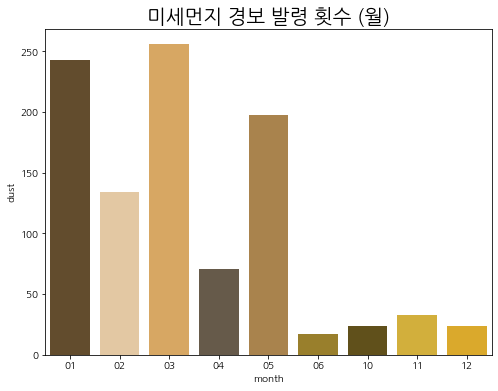

In [13]:
plt.figure(figsize = (8, 6))

sns.barplot(x = df_mon['month'], y = df_mon['dust'],
            palette = col)
plt.title('미세먼지 경보 발령 횟수 (월)', fontsize = 20)
plt.show()

# 5. 미세먼지 경보 발령 시간대

In [14]:
df_month['time'] = df_month.apply(lambda row: row['측정일시'].strftime('%H'), axis = 1)

In [15]:
df_t = df_month.groupby(['time']).agg({'dust' : 'count'}).reset_index()
df_t

,time,dust
0,00,40
1,01,37
2,02,36
3,03,39
4,04,36
5,05,32
6,06,34
7,07,38
8,08,41
9,09,43


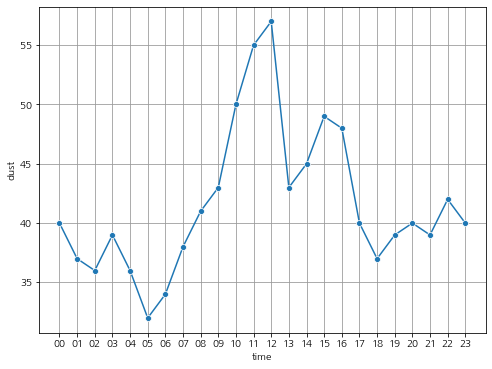

In [16]:
plt.figure(figsize = (8, 6))

sns.lineplot(x = df_t['time'], y = df_t['dust'],
            marker = 'o')
plt.grid(b = True, color='#999999')

plt.show()